In [1]:
#pip install xgboost
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
import xgboost as xgb
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay
from matplotlib import pyplot

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
x_resampled_encoding=pd.read_csv('resampled_with_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')

### Data with Resampling and without OneHotEncoding

In [4]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test1,y_train,y_test1=train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test1)

model2 =xgb.XGBClassifier(random_state=48)
start_time = timeit.default_timer()
model2.fit(train_sc, y_train)
elapsed = timeit.default_timer() - start_time
y_pred2 = model2.predict(test_sc)
print("Time taken to fit the model in sec is ",elapsed)

print(f"Accuracy score: {accuracy_score(y_test1, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test1, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test1, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test1, y_pred2):.4f}")

Time taken to fit the model in sec is  42.1936776
Accuracy score: 0.9809
F1 score : 0.9806
Recall score : 0.9620
Precision score : 0.9999


<AxesSubplot:>

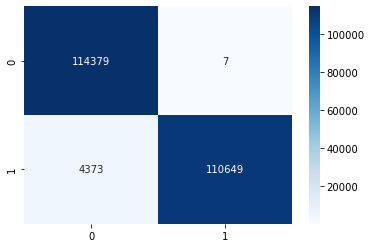

In [5]:
sns.heatmap(confusion_matrix(y_test1,y_pred2),annot=True,fmt='', cmap='Blues')

In [6]:
print(classification_report(y_test1, y_pred2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114386
           1       1.00      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



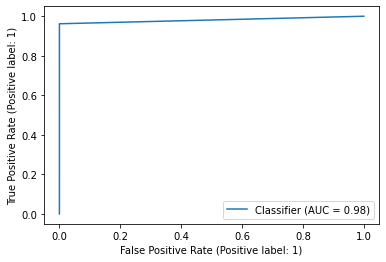

In [7]:
RocCurveDisplay.from_predictions(y_test1, y_pred2)

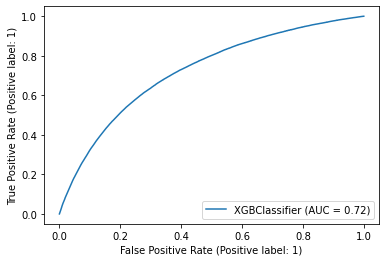

In [8]:
RocCurveDisplay.from_estimator(model2, X_test1, y_test1)

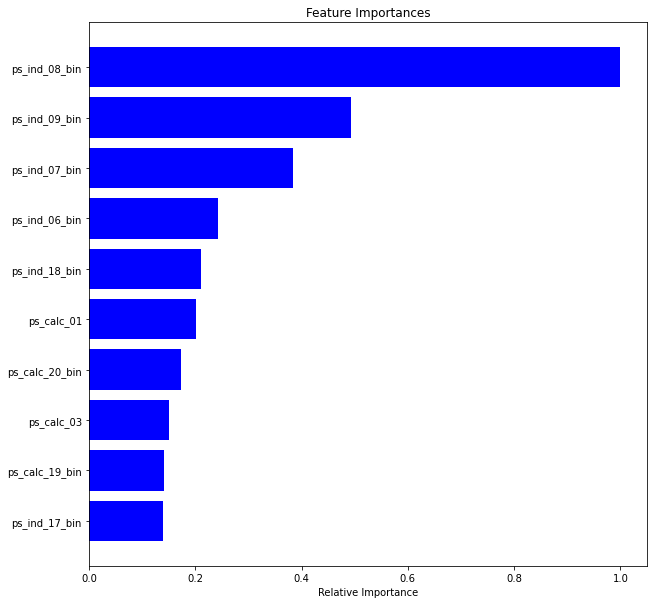

In [14]:
feat_imp = pd.DataFrame({"Col": x_resampled.columns})
feat_imp["Coef"] = model2.feature_importances_
feat_imp = feat_imp.sort_values("Coef", ascending=False)
#Scaling Weights
feat_imp["FeatImp"] = (
        (feat_imp["Coef"] - feat_imp["Coef"].min())/ (feat_imp["Coef"].max() - feat_imp["Coef"].min())).round(4)

num_features = 10 
pyplot.figure(figsize=(10,10))
pyplot.title('Feature Importances')
# only plot the customized number of features
pyplot.barh(range(num_features), feat_imp['FeatImp'][:num_features][::-1], color='b', align='center')
pyplot.yticks(range(num_features), feat_imp['Col'][:num_features][::-1])
pyplot.xlabel('Relative Importance')
pyplot.show()

### Data with Resampling and with OneHotEncoding

In [16]:
X = x_resampled_encoding.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

model=xgb.XGBClassifier(random_state=48)
start_time = timeit.default_timer()
model.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
y_pred1=model.predict(test_sc)
print("Time taken to fit the model in sec is ",elapsed)

print(f"Accuracy score: {accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Time taken to fit the model in sec is  113.06205469999998
Accuracy score: 0.9809
F1 score : 0.9806
Recall score : 0.9620
Precision score : 1.0000


In [17]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 48,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

<AxesSubplot:>

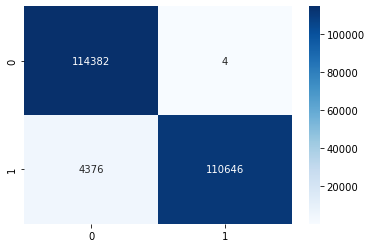

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='',cmap='Blues')

In [19]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114386
           1       1.00      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



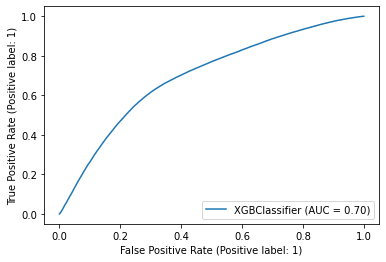

In [21]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

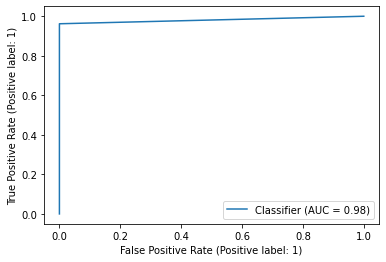

In [22]:
RocCurveDisplay.from_predictions(y_test, y_pred1)

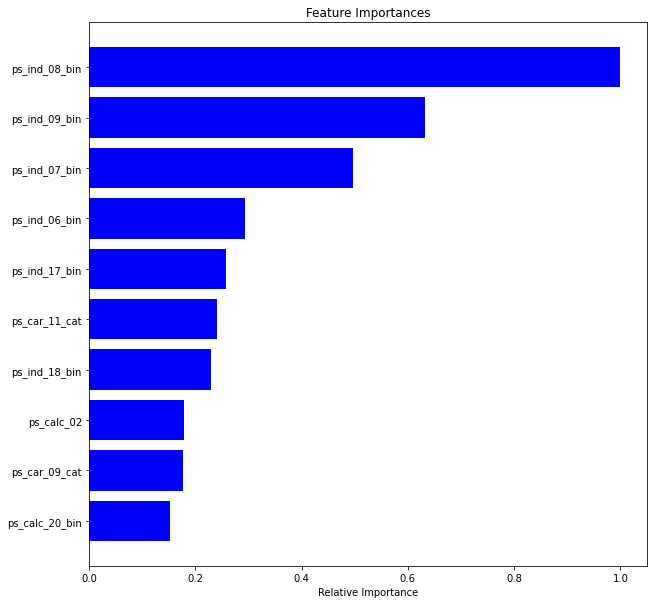

In [23]:
feat_imp = pd.DataFrame({"Col": x_resampled_encoding.columns})
feat_imp["Coef"] = model.feature_importances_
feat_imp["Col"] = feat_imp["Col"].apply(lambda x: (x.split('cat')[0]+'cat') if 'cat' in x else x)
feat_imp = feat_imp.groupby("Col",as_index=False).sum().sort_values("Coef", ascending=False)
feat_imp["FeatImp"] = (
        (feat_imp["Coef"] - feat_imp["Coef"].min())
        / (feat_imp["Coef"].max() - feat_imp["Coef"].min())
    ).round(4)

# customized number 
num_features = 10 
pyplot.figure(figsize=(10,10))
pyplot.title('Feature Importances')
# only plot the customized number of features
pyplot.barh(range(num_features), feat_imp['FeatImp'][:num_features][::-1], color='b', align='center')
pyplot.yticks(range(num_features), feat_imp['Col'][:num_features][::-1])
pyplot.xlabel('Relative Importance')
pyplot.show()

### Hyperparamter Tuning

In [4]:
params ={
    'min_child_weight':[1,3,5],
    'max_depth':[3,4,5,6,8],
    'learning_rate':[0.05,0.1,0.15],
    'gamma':[0,0.1,0.2,0.3],
    'colsample_bytree' :[0.3,0.4,0.5]
}

In [7]:
clf=xgb.XGBClassifier()
grid_search=GridSearchCV(estimator=clf,param_grid=params,n_jobs=None,cv=5,verbose=3)
start_time = timeit.default_timer()
grid_search.fit(train_sc, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
#Time taken to fit the model in sec is  82239.2026109

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.927 total time=  21.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.925 total time=  20.0s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.928 total time=  23.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.923 total time=  18.7s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.936 total time=  18.8s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.927 total time=  18.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.925 total time=  18.7s
[CV 3/5] END colsample_bytree=0.3

[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.978 total time=  39.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.977 total time=  38.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.978 total time=  39.0s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.977 total time=  37.9s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.978 total time=  36.9s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.978 total time=  38.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.977 total time=  39.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5;,

[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.980 total time=  28.7s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.980 total time=  28.6s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.979 total time=  29.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.980 total time=  29.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.979 total time=  29.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.980 total time=  29.8s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.980 total time=  29.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0

[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.980 total time=  25.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.980 total time=  26.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.981 total time=  27.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.980 total time=  28.8s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.981 total time=  28.9s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.980 total time=  28.6s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.981 total time=  29.0s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1;,

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.964 total time=  25.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.963 total time=  25.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.961 total time=  25.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.965 total time=  25.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.963 total time=  25.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.964 total time=  26.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.961 total time=  25.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.974 total time=  21.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.971 total time=  21.7s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.974 total time=  21.8s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.973 total time=  21.8s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.974 total time=  21.8s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.974 total time=  21.7s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.971 total time=  21.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_we

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.969 total time=  18.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.971 total time=  18.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.969 total time=  18.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.966 total time=  18.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.971 total time=  18.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.969 total time=  18.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.971 total time=  18.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.981 total time=  37.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.981 total time=  36.8s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.981 total time=  36.8s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.981 total time=  36.8s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.981 total time=  36.6s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.927 total time=  18.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.925 total time=  18.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=3, min_

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.971 total time=  28.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.971 total time=  28.8s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.977 total time=  37.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.978 total time=  37.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.977 total time=  37.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.977 total time=  37.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.978 total time=  37.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.980 total time=  29.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.980 total time=  28.8s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.980 total time=  28.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.980 total time=  28.7s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.979 total time=  28.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.980 total time=  28.7s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.979 total time=  28.9s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_we

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.981 total time=  25.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.980 total time=  25.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.981 total time=  25.0s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.980 total time=  25.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.981 total time=  24.9s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.981 total time=  25.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.980 total time=  25.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.951 total time=  21.8s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.953 total time=  21.7s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.951 total time=  21.7s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=0.953 total time=  21.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=0.955 total time=  21.7s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=0.951 total time=  21.8s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=0.954 total time=  21.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.959 total time=  18.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.960 total time=  18.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.957 total time=  18.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.959 total time=  18.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.962 total time=  18.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.971 total time=  21.7s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.974 total time=  21.6s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_we

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.981 total time=  37.6s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.966 total time=  18.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.971 total time=  18.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.969 total time=  18.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.971 total time=  18.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.969 total time=  18.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.966 total time=  18.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_c

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.981 total time=  37.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.981 total time=  37.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.981 total time=  37.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.981 total time=  37.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.981 total time=  37.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.981 total time=  36.8s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.981 total time=  37.0s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_

[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.971 total time=  32.9s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.969 total time=  32.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.970 total time=  32.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.971 total time=  32.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.970 total time=  32.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.971 total time=  32.9s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.970 total time=  32.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5;,

[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.977 total time=  28.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.977 total time=  28.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.977 total time=  28.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.977 total time=  28.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.978 total time=  28.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.979 total time=  32.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.980 total time=  32.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.980 total time=  24.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.980 total time=  28.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.981 total time=  28.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.980 total time=  28.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.980 total time=  28.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.981 total time=  28.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.980 total time=  28.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3;,

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.950 total time=  24.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.950 total time=  24.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.948 total time=  24.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.946 total time=  24.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.947 total time=  24.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.950 total time=  24.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.950 total time=  24.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.960 total time=  20.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.956 total time=  20.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.958 total time=  20.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.962 total time=  20.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.957 total time=  20.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.960 total time=  20.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.956 total time=  20.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_we

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.980 total time=  41.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.981 total time=  41.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.980 total time=  42.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.981 total time=  41.9s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.981 total time=  41.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.971 total time=  20.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.968 total time=  20.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=3, min_child

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.981 total time=  32.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.981 total time=  32.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.981 total time=  42.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.981 total time=  42.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.981 total time=  42.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.981 total time=  43.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.981 total time=  42.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.971 total time=  32.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.968 total time=  32.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.971 total time=  32.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.970 total time=  32.8s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.970 total time=  32.8s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.971 total time=  33.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.969 total time=  32.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.978 total time=  28.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.977 total time=  28.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.977 total time=  28.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.977 total time=  28.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.978 total time=  28.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.978 total time=  28.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.977 total time=  28.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_we

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.978 total time=  24.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.978 total time=  24.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.980 total time=  23.9s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.978 total time=  23.9s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.980 total time=  24.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.979 total time=  24.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.978 total time=  24.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.923 total time=  20.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.926 total time=  20.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.921 total time=  20.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.929 total time=  20.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.929 total time=  20.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.948 total time=  24.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.946 total time=  23.9s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.977 total time=  42.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.977 total time=  42.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.957 total time=  20.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.960 total time=  20.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.956 total time=  20.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.958 total time=  20.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.962 total time=  20.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.980 total time=  42.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.981 total time=  42.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.981 total time=  42.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.980 total time=  42.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.981 total time=  42.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.980 total time=  41.9s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.981 total time=  42.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_we

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.980 total time=  32.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.981 total time=  32.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.980 total time=  32.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.981 total time=  32.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.981 total time=  32.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.980 total time=  32.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.981 total time=  32.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_

[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.965 total time=  32.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.964 total time=  32.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.963 total time=  32.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.967 total time=  32.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.967 total time=  32.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.965 total time=  32.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.973 total time=  37.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1;,

[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.976 total time=  27.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.974 total time=  27.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.976 total time=  32.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.978 total time=  32.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.978 total time=  32.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.979 total time=  32.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.978 total time=  32.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0

[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.980 total time=  27.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.980 total time=  27.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.980 total time=  27.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.979 total time=  27.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.980 total time=  27.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.980 total time=  27.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.979 total time=  27.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=3;,

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.929 total time=  22.7s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.934 total time=  22.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.931 total time=  22.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.931 total time=  22.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.926 total time=  23.4s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.929 total time=  22.9s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.934 total time=  22.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.979 total time=  49.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.978 total time=  48.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.979 total time=  49.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.979 total time=  49.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.979 total time=  50.9s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.979 total time=  49.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.959 total time=  22.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_ch

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.979 total time=  37.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.980 total time=  38.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.980 total time=  38.9s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.980 total time=  51.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.981 total time=  49.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.980 total time=  49.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.981 total time=  49.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_we

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.980 total time=  37.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.981 total time=  36.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.980 total time=  37.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.981 total time=  37.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.981 total time=  37.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.980 total time=  36.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.981 total time=  37.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.967 total time=  32.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.965 total time=  33.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.964 total time=  32.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.965 total time=  32.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.967 total time=  32.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.967 total time=  32.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.965 total time=  32.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.974 total time=  35.7s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.974 total time=  35.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.976 total time=  35.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.974 total time=  35.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.974 total time=  36.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.974 total time=  35.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.974 total time=  35.9s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.971 total time=  22.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.969 total time=  22.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.971 total time=  22.7s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.971 total time=  22.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.972 total time=  22.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.971 total time=  22.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.979 total time=  27.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.981 total time=  48.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.981 total time=  49.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.981 total time=  48.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.926 total time=  22.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.929 total time=  22.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.934 total time=  22.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.931 total time=  22.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=3, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.978 total time=  51.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.979 total time=  53.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.979 total time=  53.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.979 total time=  53.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.979 total time=  52.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.978 total time=  50.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.979 total time=  52.9s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.980 total time=  40.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.980 total time=  39.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.979 total time=  40.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.981 total time=  40.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.980 total time=  39.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.980 total time=  40.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.980 total time=  40.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_we

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.981 total time=  33.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.980 total time=  34.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.981 total time=  34.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.981 total time=  34.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.980 total time=  34.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.981 total time=  34.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.980 total time=  34.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_

In [8]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [9]:
grid_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.15,
 'max_depth': 8,
 'min_child_weight': 3}

In [11]:
grid_search.best_score_

0.981010824116163

In [13]:
clf1=grid_search.best_estimator_
start_time = timeit.default_timer()
clf1.fit(train_sc, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  64.20180049999908


In [28]:
clf1=xgb.XGBClassifier(colsample_bytree = 0.5,
 gamma= 0,
 learning_rate=0.15,
 max_depth=8,
 min_child_weight=3,random_state=0)

start_time = timeit.default_timer()
clf1.fit(train_sc, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred = clf1.predict(test_sc)

print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Time taken to fit the model in sec is  78.91370189999998
Accuracy score: 0.9810
F1 score : 0.9806
Recall score : 0.9620
Precision score : 1.0000


<AxesSubplot:>

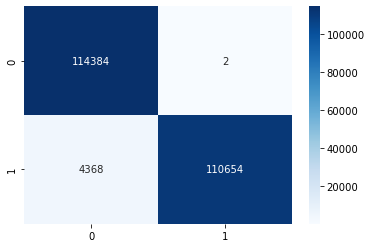

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='Blues')

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114386
           1       1.00      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



### Feature importance

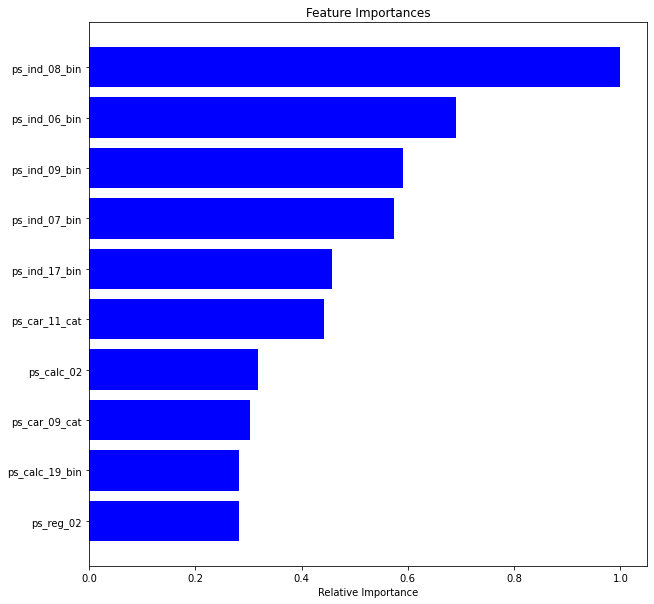

In [31]:
feat_imp = pd.DataFrame({"Col": x_resampled_encoding.columns})
feat_imp["Coef"] = clf1.feature_importances_
feat_imp["Col"] = feat_imp["Col"].apply(lambda x: (x.split('cat')[0]+'cat') if 'cat' in x else x)
feat_imp = feat_imp.groupby("Col",as_index=False).sum().sort_values("Coef", ascending=False)
feat_imp["FeatImp"] = (
        (feat_imp["Coef"] - feat_imp["Coef"].min())
        / (feat_imp["Coef"].max() - feat_imp["Coef"].min())
    ).round(4)

# customized number 
num_features = 10 
pyplot.figure(figsize=(10,10))
pyplot.title('Feature Importances')
# only plot the customized number of features
pyplot.barh(range(num_features), feat_imp['FeatImp'][:num_features][::-1], color='b', align='center')
pyplot.yticks(range(num_features), feat_imp['Col'][:num_features][::-1])
pyplot.xlabel('Relative Importance')
pyplot.show()

* https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/#:~:text=The%20XGBoost%20library%20provides%20a%20built-in%20function%20to,Indians%20dataset%20using%20the%20built-in%20plot_importance%20%28%29%20function.

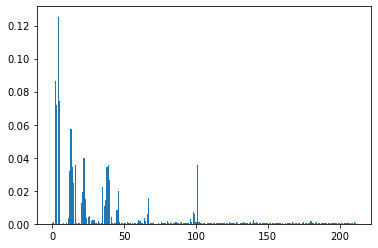

In [32]:
# plot
pyplot.bar(range(len(clf1.feature_importances_)), clf1.feature_importances_)
pyplot.show()

### Selected dataset

In [33]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(clf1, threshold=0.03, prefit=True)
selected_dataset = selection.transform(X_test)

In [34]:
selected_dataset.shape

(229408, 12)

* you will get a dataset with only the features of which the importance pass the threshold, as Numpy array. Point that the threshold is relative to the total importance, so it goes from 0 to 1.